
# <font color=green>U3 Model Tuning_Module 5 Machine Learning




### Context -

DRS bank is facing challenging times. Their NPAs (Non-Performing Assets) has been on a rise recently and a large part of these are due to the loans given to individual customers(borrowers). Chief Risk Officer of the bank decides to put in a scientifically robust framework for approval of loans to individual customers to minimize the risk of loans converting into NPAs and initiates a project for the data science team at the bank. You, as a senior member of the team, are assigned this project.

### Objective -
To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized

### Key questions to be answered –
What are the factors that drive the behavior of loan delinquency?

#### Dataset:
* ID: Customer ID
* isDelinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)
* term: Loan term in months
* gender: Gender of the borrower
* age: Age of the borrower
* purpose: Purpose of Loan
* home_ownership: Status of borrower's home
* FICO: FICO (i.e. the bureau score) of the borrower

### Domain Information –
Transactor – A person who pays his due amount balance full and on time.
Revolver – A person who pays the minimum due amount but keeps revolving his balance and does not pay the full amount.
Delinquent - Delinquency means that you are behind on payments, a person who fails to pay even the minimum due amount.
Defaulter – Once you are delinquent for a certain period your lender will declare you to be in the default stage.
Risk Analytics – A wide domain in the financial and banking industry, basically analyzing the risk of the customer.


### Import the necessary packages

In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [3]:
df = pd.read_csv("Loan_Delinquent_Dataset.csv")

In [4]:
# copying data to another varaible to avoid any changes to original data
loan=df.copy()

### View the first and last 5 rows of the dataset.

In [5]:
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [5]:
loan.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


### Understand the shape of the dataset.

In [6]:
loan.shape

(11548, 8)

* The dataset has 11548 rows and 8 columns of data

### Check the data types of the columns for the dataset.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


In [8]:
# avoid cell value truncated 
pd.set_option('display.max_colwidth', None)
all_values = []
for col in df.columns:
    all_values.append(df[col].unique())

unique_df = pd.DataFrame({'Column':df.columns, 'Unique Values':all_values})
unique_df

,Column,Unique Values
0,ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,isDelinquent,"[1, 0]"
2,term,"[36 months, 60 months]"
3,gender,"[Female, Male]"
4,purpose,"[House, Car, Other, Personal, Wedding, Medical, other]"
5,home_ownership,"[Mortgage, Rent, Own]"
6,age,"[>25, 20-25]"
7,FICO,"[300-500, >500]"


## Fixing the data types

* term,gender,purpose,home_ownership,age anf FICO are of object type, we can change them to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [6]:
loan["term"] = loan["term"].astype("category")
loan["gender"] = loan["gender"].astype("category")
loan["purpose"] = loan["purpose"].astype("category")
loan["home_ownership"] = loan["home_ownership"].astype("category")
loan["age"] = loan["age"].astype("category")
loan["FICO"] = loan["FICO"].astype("category")
loan["isDelinquent"] = loan["isDelinquent"].astype("category")

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              11548 non-null  int64   
 1   isDelinquent    11548 non-null  category
 2   term            11548 non-null  category
 3   gender          11548 non-null  category
 4   purpose         11548 non-null  category
 5   home_ownership  11548 non-null  category
 6   age             11548 non-null  category
 7   FICO            11548 non-null  category
dtypes: category(7), int64(1)
memory usage: 170.4 KB


`we can see that the memory usage has decreased from 721.9KB to 249.1KB`

**Observations -**
* isDelinquent is the dependent variable - type integer.
* isDelinquent is a class variable and should be converted to a categorical variable for further analysis.
* All the dependent variables except for ID are categorical.


### Summary of the dataset.

In [11]:
loan.describe(include="all")

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.0,11548,11548,11548,11548,11548,11548
unique,NaN,2.0,2,2,7,3,2,2
top,NaN,1.0,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,7721.0,10589,6555,6892,5461,5888,6370
mean,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations-**   

* Most of the customers are loan delinquent(1).
* Most of the loans are for a 36-month term loan.
* More males have applied for loans than females.
* Most loan applications are for house loans.
* Most customers have either mortgaged their houses.
* Mostly customers in the age group 20-25 have applied for a loan.
* Most customers have a FICO score between 300 and 500.

In [12]:
# checking for unique values in ID column
loan["ID"].nunique()

11548

* Since all the values in ID column are unique we can drop it

In [7]:
loan.drop(["ID"],axis=1,inplace=True)

In [14]:
loan.columns

Index(['isDelinquent', 'term', 'gender', 'purpose', 'home_ownership', 'age',
       'FICO'],
      dtype='object')

### Check for missing values

In [15]:
loan.isnull().sum()

isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

In [16]:
loan.isna().sum()

isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

* There are no missing vaues in out dataset

### Univariate analysis

In [17]:
# Function to create barplots that indicate percentage for each category.
sns.set_context('notebook', font_scale = 1.2)
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    print(total)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y + 100), size = 12) # annotate the percantage 
    plt.title(f'Distribution of {ax.get_xlabel()}', fontweight = 'bold')
    plt.show() # show the plot

## Observations on isDelinquent

11548


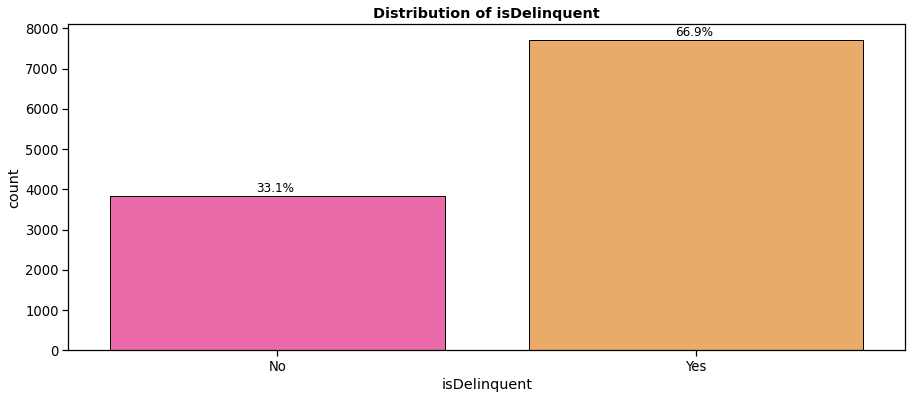

In [18]:
plt.figure(figsize=(15,6))
ax = sns.countplot(loan["isDelinquent"],palette='spring', edgecolor = 'black')
plt.xticks([0, 1], ['No', 'Yes'])
perc_on_bar(ax,loan["isDelinquent"])

* 66% of the customers are delinquent

## Observations on term

11548


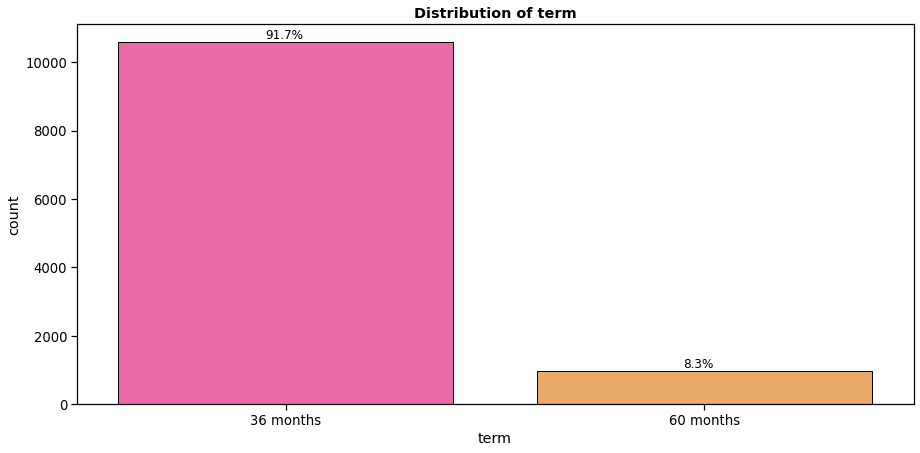

In [19]:
plt.figure(figsize=(15,7))
ax = sns.countplot(loan["term"], palette = 'spring', edgecolor = 'black')
perc_on_bar(ax,loan["term"])

* 91.7% of the loans are for a 36 month term.

## Observations on gender

11548


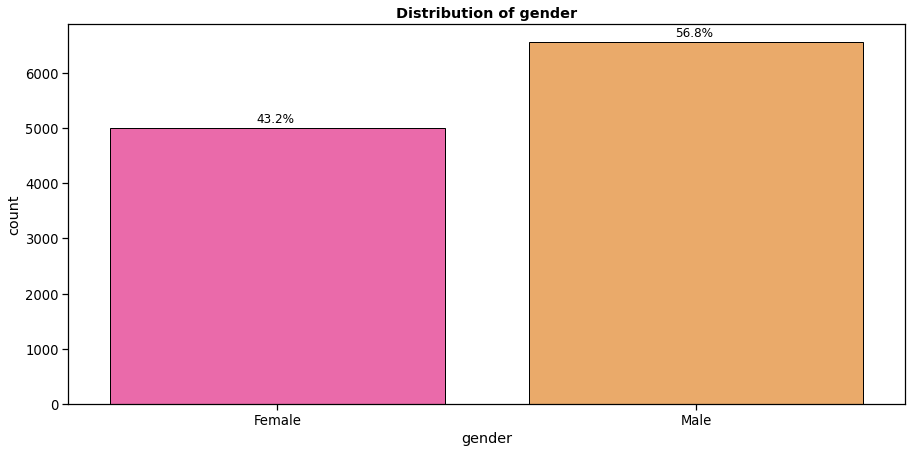

In [20]:
plt.figure(figsize=(15,7))
ax = sns.countplot(loan["gender"], palette = 'spring', edgecolor = 'black')
perc_on_bar(ax,loan["gender"])

* There are more male applicants (56.8%) than female applicants (43.2%)

## Observations on purpose

11548


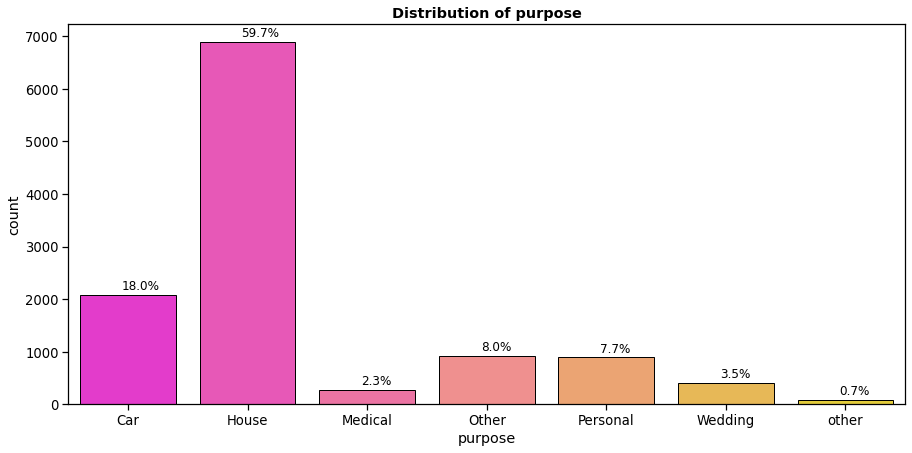

In [21]:
plt.figure(figsize=(15,7))
ax = sns.countplot(loan["purpose"], palette = 'spring', edgecolor = 'black')
perc_on_bar(ax,loan["purpose"])

* Most loan applications are for house loans (59.7%) followed by car loans (18%)
* There are 2 levels named 'other' and 'Other' under the purpose variable. Since we do not have any other information about these, we can merge these levels.

## Observations on home_ownership

11548


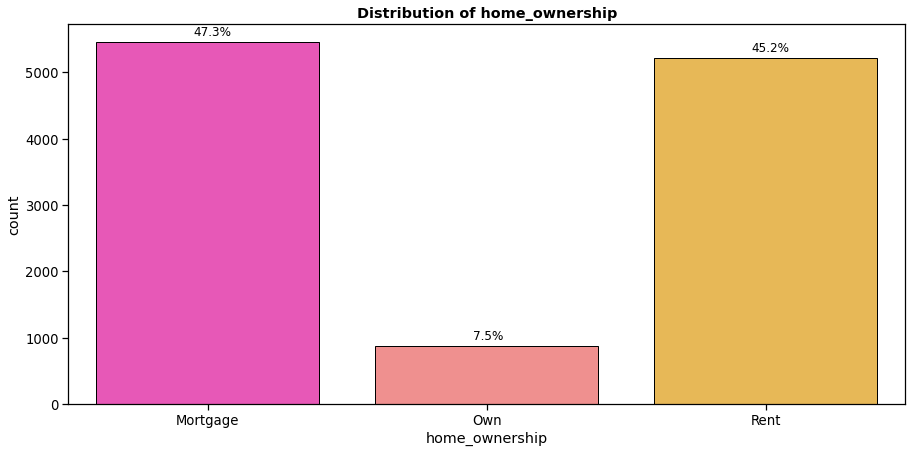

In [22]:
plt.figure(figsize=(15,7))
ax = sns.countplot(loan["home_ownership"], palette = 'spring', edgecolor = 'black')
perc_on_bar(ax,loan["home_ownership"])

* Very few applicants <10% own their house, Most customers have either mortgaged their houses or live on rent. 

## Observations on age

11548


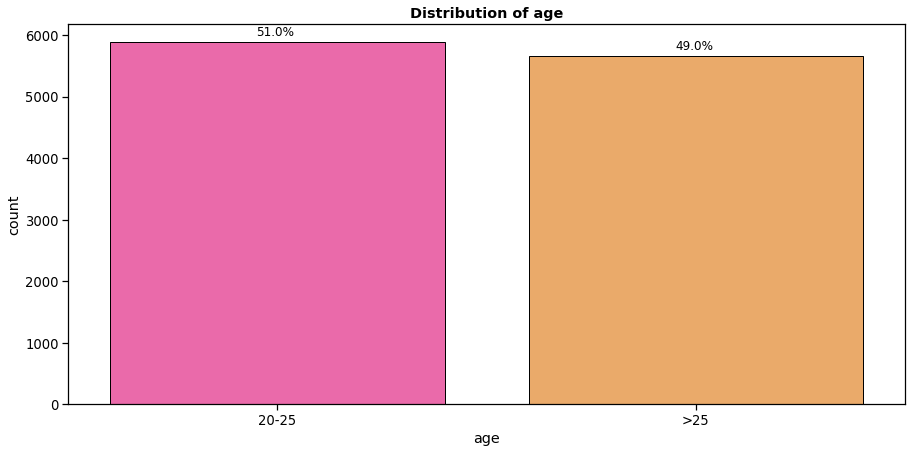

In [23]:
plt.figure(figsize=(15,7))
ax = sns.countplot(loan["age"], palette = 'spring', edgecolor = 'black')
perc_on_bar(ax,loan["age"])

* Almost an equal percentage of people aged 20-25 and >25 have applied for the loan.

## Observations on FICO

11548


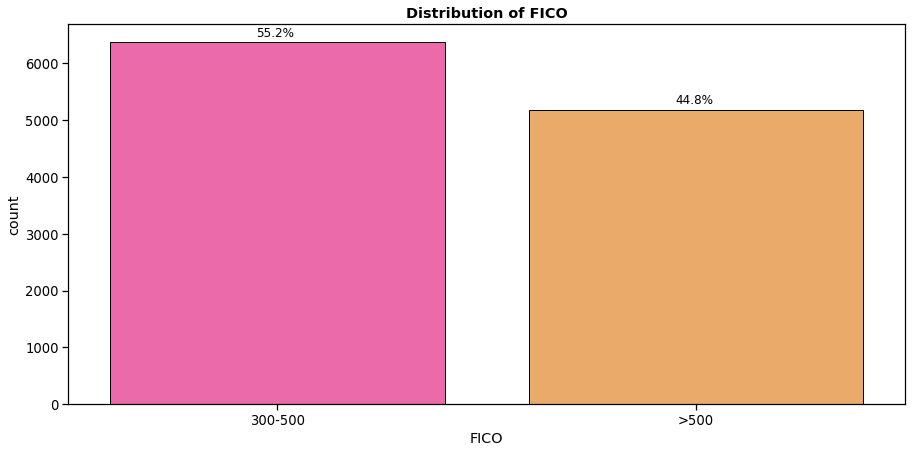

In [24]:
plt.figure(figsize=(15,7))
ax = sns.countplot(loan["FICO"], palette = 'spring', edgecolor = 'black')
perc_on_bar(ax,loan["FICO"])

* Most customers have a FICO score between 300 and 500 (55.2%) followed by a score of greater than 500 (44.8%)

## Data Cleaning

In [25]:
loan["purpose"].unique()

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']

### We can merge the purpose -  'other' and 'Other' together

In [8]:
loan["purpose"].replace('other',"Other",inplace=True)

In [27]:
loan['term'].unique()

['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']

In [28]:
# avoid cell value truncated 
pd.set_option('display.max_colwidth', None)
all_values = []
for col in loan.columns:
    all_values.append(loan[col].unique())

unique_df = pd.DataFrame({'Column':loan.columns, 'Unique Values':all_values})
unique_df

,Column,Unique Values
0,isDelinquent,"[1, 0] Categories (2, int64): [1, 0]"
1,term,"['36 months', '60 months'] Categories (2, object): ['36 months', '60 months']"
2,gender,"['Female', 'Male'] Categories (2, object): ['Female', 'Male']"
3,purpose,"['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical'] Categories (6, object): ['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical']"
4,home_ownership,"['Mortgage', 'Rent', 'Own'] Categories (3, object): ['Mortgage', 'Rent', 'Own']"
5,age,"['>25', '20-25'] Categories (2, object): ['>25', '20-25']"
6,FICO,"['300-500', '>500'] Categories (2, object): ['300-500', '>500']"


In [29]:
loan["purpose"].unique()

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical']
Categories (6, object): ['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical']

## Bivariate Analysis

In [30]:
def stacked_plot(x):
    # crosstab
    pal = ["lightblue", "orange"]
    ax= pd.crosstab(x, loan['isDelinquent']).apply(lambda r: r/r.sum()*100, axis=1)
    ax_1 = ax.plot.bar(figsize=(10,5), stacked=True, rot=0, color = pal, edgecolor = 'black')
    display(ax)
    
    plt.legend(['No', 'Yes'], loc='upper center', bbox_to_anchor=(1.0, 1.0), title="IsDelinquent")
    
    plt.ylabel('Percent Distribution')
    
    for rec in ax_1.patches:
        height = rec.get_height()
        ax_1.text(rec.get_x() + rec.get_width() / 2, 
                  rec.get_y() + height / 2,
                  "{:.0f}%".format(height),
                  ha='center', 
                  va='bottom')
    plt.title(f'Distribution of {ax_1.get_xlabel()} explained with isDelinquent', fontweight = 'bold')
    plt.show()

isDelinquent,0,1
term,,
36 months,29.917839,70.082161
60 months,68.717414,31.282586


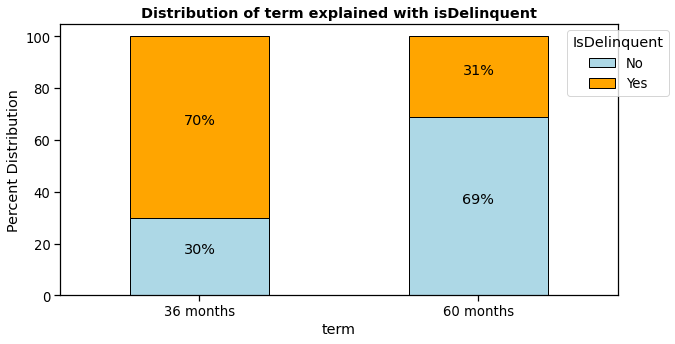

In [31]:
stacked_plot(loan['term'])

* Most loan delinquent customers have taken loan for 36 months.

isDelinquent,0,1
gender,,
Female,37.051873,62.948127
Male,30.160183,69.839817


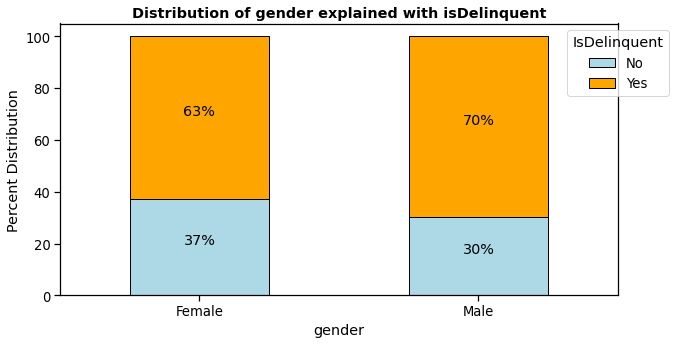

In [32]:
stacked_plot(loan['gender'])

* There's not much difference between male and female customers.

isDelinquent,0,1
purpose,,
Car,32.596154,67.403846
House,32.965757,67.034243
Medical,40.225564,59.774436
Other,35.346535,64.653465
Personal,30.717489,69.282511
Wedding,34.068627,65.931373


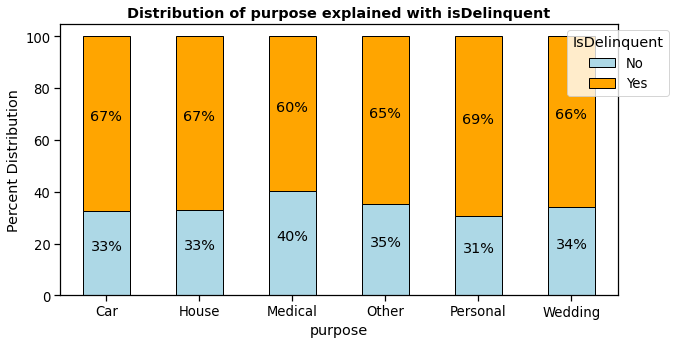

In [33]:
stacked_plot(loan['purpose'])

* Most loan delinquent customers are those who have applied for house loans followed by car and personal loans.

isDelinquent,0,1
home_ownership,,
Mortgage,33.528658,66.471342
Own,29.735936,70.264064
Rent,33.301380,66.698620


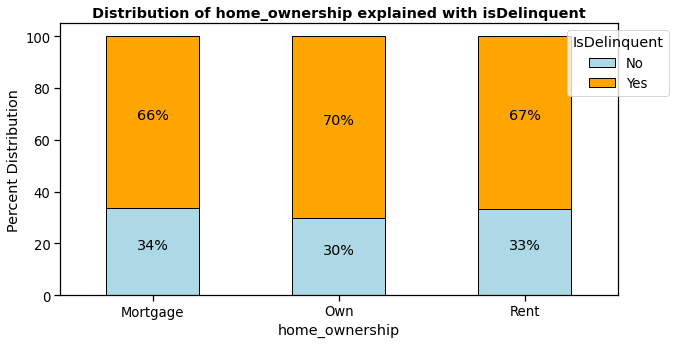

In [34]:
stacked_plot(loan['home_ownership'])

* Those customers who have their own house are less delinquent than the ones who live in a rented place or have mortgaged their home.

isDelinquent,0,1
age,,
20-25,31.555707,68.444293
>25,34.787986,65.212014


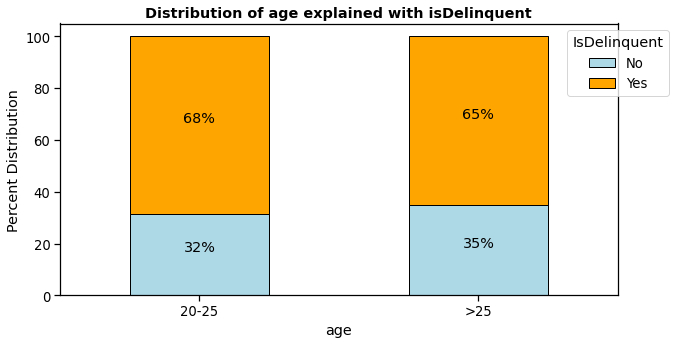

In [35]:
stacked_plot(loan['age'])

* Customers between 20-25 years of age are more delinquent.

isDelinquent,0,1
FICO,,
300-500,14.772370,85.227630
>500,55.735805,44.264195


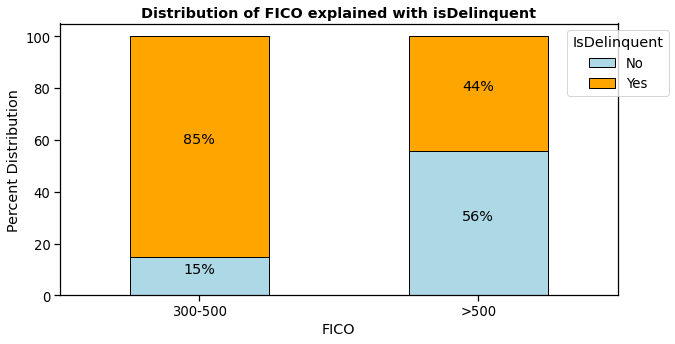

In [36]:
stacked_plot(loan['FICO'])

* If FICO score is >500 the chances of delinquency decrease quite a lot compared to when FICO score is between 300-500.

### Key Observations - 
* FICO score and term of loan application appear to be very strong indicators of delinquency.

* Other factors appear to be not very good indicators of delinquency. (We can use chi-square tests to determine statistical significance in the association between two categorical variables).

### We observed that a high FICO score means that the chances of delinquency are lower, let us see  if any of the other variables indicate higher a FICO score.

In [37]:
def stacked_plot_FICO(x):
    # crosstab
    pal = ["pink", "yellow"]
    ax= pd.crosstab(x, loan['FICO']).apply(lambda r: r/r.sum()*100, axis=1)
    ax_1 = ax.plot.bar(figsize=(10,5), stacked=True, rot=0, color = pal, edgecolor = 'black')
    display(ax)
    
    plt.legend(['300 - 500', '> 500'], loc='upper center', bbox_to_anchor=(1.0, 1.0), title="FICO score")
    
    plt.ylabel('Percent Distribution')
    
    for rec in ax_1.patches:
        height = rec.get_height()
        ax_1.text(rec.get_x() + rec.get_width() / 2, 
                  rec.get_y() + height / 2,
                  "{:.0f}%".format(height),
                  ha='center', 
                  va='bottom')
    plt.title(f'Distribution of {ax_1.get_xlabel()} explained with FICO score', fontweight = 'bold')
    plt.show()

FICO,300-500,>500
home_ownership,,
Mortgage,52.316426,47.683574
Own,55.109070,44.890930
Rent,58.148006,41.851994


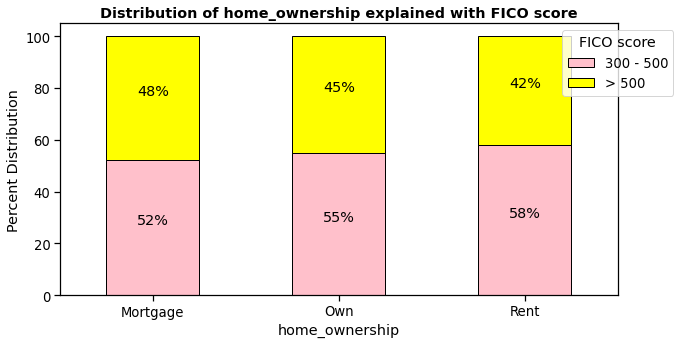

In [38]:
stacked_plot_FICO(loan['home_ownership'])

FICO,300-500,>500
home_ownership,,
Mortgage,52.316426,47.683574
Own,55.109070,44.890930
Rent,58.148006,41.851994


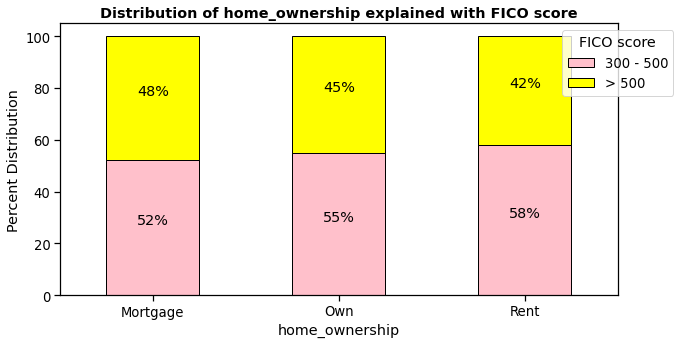

In [39]:
stacked_plot_FICO(loan['home_ownership'])

FICO,300-500,>500
age,,
20-25,66.694973,33.305027
>25,43.162544,56.837456


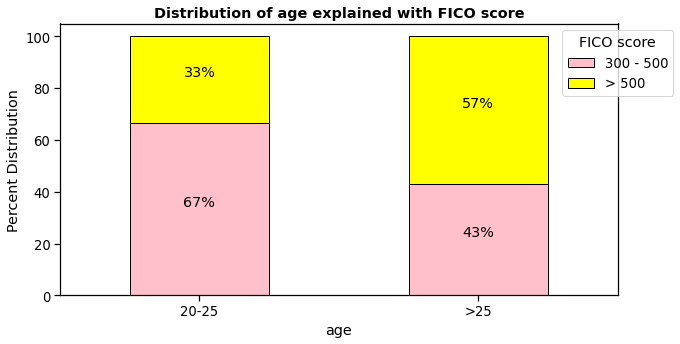

In [40]:
stacked_plot_FICO(loan['age'])

FICO,300-500,>500
gender,,
Female,53.374725,46.625275
Male,56.521739,43.478261


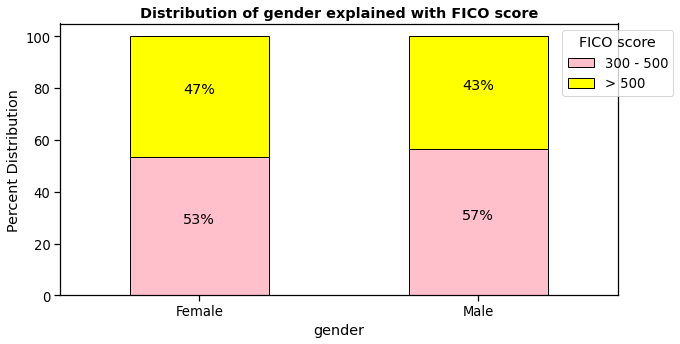

In [41]:
stacked_plot_FICO(loan['gender'])

## Key Observations

1. Home ownership and gender seem to have a slight impact on the FICO scores.
2. Age seems to have a much bigger impact on FICO scores.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

## Split Data

In [10]:
x = loan.drop(["isDelinquent"], axis=1)
y = loan["isDelinquent"]

In [11]:
x.head()

,term,gender,purpose,home_ownership,age,FICO
0,36 months,Female,House,Mortgage,>25,300-500
1,36 months,Female,House,Rent,20-25,>500
2,36 months,Female,House,Rent,>25,300-500
3,36 months,Female,Car,Mortgage,>25,300-500
4,36 months,Female,House,Rent,>25,300-500


In [44]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: isDelinquent, dtype: category
Categories (2, int64): [0, 1]

In [12]:
# encoding the categorical variables
x = pd.get_dummies(x, drop_first=True)
x.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


##  <font color=green>Split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7, stratify = y)

In [14]:
print(f'There are {np.round(len(X_train)/len(x.index) * 100, 2)}% data in training dataset.')
print(f'There are {np.round(len(X_test)/len(x.index) * 100, 2)}% data in testing dataset.')

There are 69.99% data in training dataset.
There are 30.01% data in testing dataset.


In [48]:
y_test.value_counts(1)

1    0.668687
0    0.331313
Name: isDelinquent, dtype: float64

In [49]:
y_train.value_counts(1)

1    0.668564
0    0.331436
Name: isDelinquent, dtype: float64

In [50]:
y_train.value_counts()

1    5404
0    2679
Name: isDelinquent, dtype: int64

**What does a bank want?**
* A bank wants to minimize the loss - it can face 2 types of losses here: 
   * Whenever a bank lends money to a customer, they don't return that.
   * A bank doesn't lend money to a customer thinking a customer will default but in reality, the customer won't - opportunity loss.

**Which loss is greater ?**
* Lending to a customer who wouldn't be able to pay back.

**Since we want to reduce loan delinquency we should use Recall as a metric of model evaluation instead of accuracy.**

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting loan-delinquent customers as a non-loan-delinquent customer.

In [15]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. 
    #The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [16]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix\n', fontweight = 'bold')

### Logistic Regression 

In [17]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [54]:
sns.set_style('whitegrid')

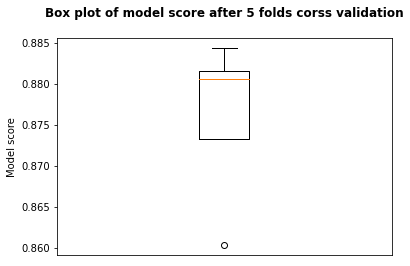

In [18]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel('Model score')
plt.title('Box plot of model score after 5 folds corss validation\n', fontweight = 'bold')
plt.show()

* Performance on training set varies between x to y recall.
* Let's check the performance on test data.

Accuracy on training set :  0.7834962266485216
Accuracy on test set :  0.7948051948051948
Recall on training set :  0.877498149518875
Recall on test set :  0.8813120414328873
Precision on training set :  0.8133790737564323
Precision on test set :  0.8240516545601292


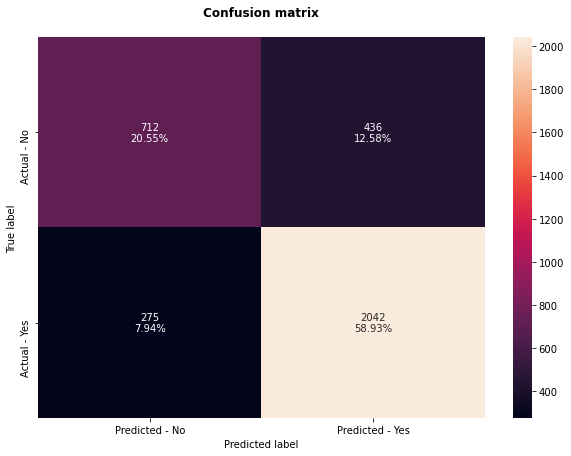

In [19]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

In [28]:
loan.columns

Index(['isDelinquent', 'term', 'gender', 'purpose', 'home_ownership', 'age',
       'FICO'],
      dtype='object')

In [26]:
lr.coef_.reshape(-1).shape

(11,)

In [30]:
X_train.shape

(8083, 11)

In [27]:
lr.coef_

array([[-2.11925644,  0.77988303,  0.04490702,  0.34955528, -0.01255303,
         0.09306291,  0.09932886,  0.15806143, -0.10960038,  0.58896044,
        -2.03817763]])

In [41]:
a = pd.DataFrame({'Predictors':X_train.columns, 'Coef':lr.coef_.reshape(-1)})
a = a.append({'Predictors':'intercept', 'Coef':lr.intercept_.item()}, ignore_index = True)
a

,Predictors,Coef
0,term_60 months,-2.119256
1,gender_Male,0.779883
2,purpose_House,0.044907
3,purpose_Medical,0.349555
4,purpose_Other,-0.012553
5,purpose_Personal,0.093063
6,purpose_Wedding,0.099329
7,home_ownership_Own,0.158061
8,home_ownership_Rent,-0.109600
9,age_>25,0.588960


* Logistic Regression has given a generalized performance on training and test set.
* Recall is very also very good, let's see if the model performance can be further improved by:

  a) Oversampling - getting more data points for the minority class.
  
  b) Undersampling - dealing with the class imbalance.

### Oversampling train data using SMOTE- explain what is smote

In [57]:
from imblearn.over_sampling import SMOTE

In [63]:
print("Before UpSampling, counts of label 'Yes' for delinquent customer: {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No' for delinquent customer: {} \n".format(sum(y_train==0)))

Before UpSampling, counts of label 'Yes' for delinquent customer: 5404
Before UpSampling, counts of label 'No' for delinquent customer: 2679 



In [66]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [67]:
print("After UpSampling, counts of label 'Yes' for delinquent customer: {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No' for delinquent customer: {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

After UpSampling, counts of label 'Yes' for delinquent customer: 5404
After UpSampling, counts of label 'No' for delinquent customer: 5404 

After UpSampling, the shape of train_X: (10808, 11)
After UpSampling, the shape of train_y: (10808,) 



### Logistic Regression on oversampled data

In [59]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

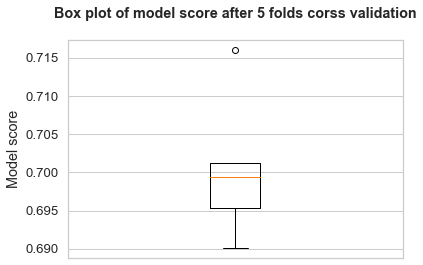

In [69]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel('Model score')
plt.title('Box plot of model score after 5 folds corss validation\n', fontweight = 'bold')
plt.show()

* Performance on training set varies between 0.69 to 0.72 recall.
* Let's check the performance on test data.

Accuracy on training set :  0.7721132494448557
Accuracy on test set :  0.7523809523809524
Recall on training set :  0.7004071058475203
Recall on test set :  0.7095381959430298
Precision on training set :  0.8176712032836466
Precision on test set :  0.8988518316019682


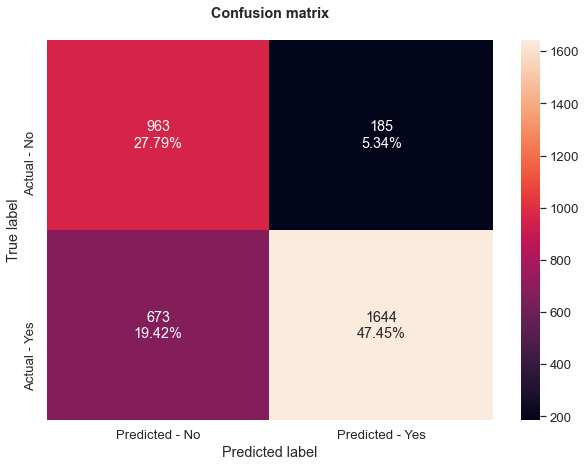

In [61]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is very also good, but it has decreased from the initial logistic model.
* Let's see if regualarization/tuning can make the model performance better.

### Regularization- explain what is regularization

In [70]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

In [71]:
# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

In [72]:
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

In [73]:
# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

In [74]:
# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

In [75]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7244633604737232
Accuracy on test set :  0.7292929292929293
Recall on training set :  0.7004071058475203
Recall on test set :  0.7095381959430298
Precision on training set :  0.7358087091757387
Precision on test set :  0.8611838658983761


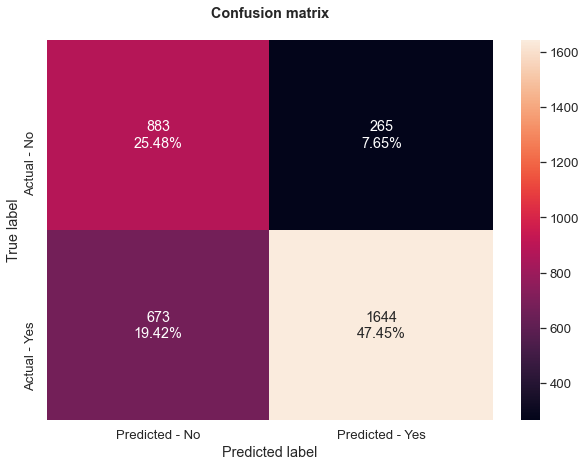

In [80]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* Model performance hasn't improved much after regularization.

## Business Insights

* FICO, term and gender are the  important variables in determining if a borrower will get into a delinquent stage 
* No borrower shall be given a loan if they are applying for a 36 month term loan and have a FICO score in the range 300-500.
* Female borrowers with a FICO score greater than 500 should be our target customers.
* Criteria to approve loan according to decision tree model should depend on three main factors - FICO score, duration of loan and gender that is - If the FICO score is less than 500 and the duration of loan is less than 60 months then the customer will not be able to repay the loans. If the customer has greater than 500 FICO score and is a female higher chances that they will repay the loans.